In [26]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd
from skimage import measure
import statistics
import glob

In [27]:
def RGB(array):
    return array[:,:,0], array[:,:,1], array[:,:,2]

def NCC(R,G,B):
    I = R + G + B
   
    I[I == 0] = 1000000
    
    r = R / I
    g = G / I
    b = 1 - r - g

    return r, g ,b 

def find_max_mode(list1):
    list_table = statistics._counts(list1)
    len_table = len(list_table)

    if len_table == 1:
        max_mode = statistics.mode(list1)
    else:
        new_list = []
        for i in range(len_table):
            new_list.append(list_table[i][0])
        max_mode = max(new_list) # use the max value here
    return max_mode

def most_element(liste):
    numeral=[[liste.count(nb), nb] for nb in liste]
    numeral.sort(key=lambda x:x[0], reverse=True)
    return(numeral[0][1])

In [44]:
unripe = sorted(glob.glob('bananas/Green/*'))
ripe = sorted(glob.glob('bananas/Midripen/*'))
midripe = sorted(glob.glob('bananas/Yellowish_Green/*'))
overripe = sorted(glob.glob('bananas/Overripen/*'))

In [67]:
R_list_ripe = []
G_list_ripe = []
B_list_ripe = []
for ripe_fruit in ripe:
    img = cv2.imread(ripe_fruit)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#     ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
#     im_th = thresh.copy()
#     im_floodfill = im_th.copy()
#     height, width = im_th.shape[:2]
#     mask = np.zeros((height+2, width+2), np.uint8)
#     cv2.floodFill(im_floodfill, mask, (0,0), 255)
#     im_floodfill_inv = cv2.bitwise_not(im_floodfill)
#     im_out = im_th | im_floodfill_inv
    
#     thresh = im_out.copy()
#     ellipse = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(2,2))
#     thresh = cv2.dilate(thresh, ellipse, iterations = 1)
#     thresh = cv2.erode(thresh, ellipse, iterations = 1)
#     thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, ellipse, iterations = 1)
    
#     nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(thresh, connectivity=8)
#     sizes = stats[1:, -1]; nb_components = nb_components - 1
#     min_size = 200

#     thresh = np.zeros((output.shape))
#     for i in range(0, nb_components):
#         if sizes[i] >= min_size:
#             thresh[output == i + 1] = 255
    
#     mask = thresh.copy()
#     mask[mask == 255] = 1
#     mask[mask == 0] = 0
    
    threshold = 130
    mask = gray.copy()
    mask[mask < threshold] = 1
    mask[mask >= threshold] = 0
    
    image = plt.imread(ripe_fruit)
    image_R = image[:,:,0]
    image_G = image[:,:,1]
    image_B = image[:,:,2]
    
    image_masked = image.copy()
    image_masked[:,:,0] = image_R * mask
    image_masked[:,:,1] = image_G * mask
    image_masked[:,:,2] = image_B * mask
    
    R = list(filter(lambda a: a != 0, (image_R * mask).flatten()))
    G = list(filter(lambda a: a != 0, (image_G * mask).flatten()))
    B = list(filter(lambda a: a != 0, (image_B * mask).flatten()))
    
    R = list(filter(lambda a: a < 170, R))
    G = list(filter(lambda a: a < 170, G))
    B = list(filter(lambda a: a < 170, B))
    
    print('average R:', np.mean(R))
    print('average G:', np.mean(G))
    print('average B:', np.mean(B))
    
    R_list_ripe.append(np.mean(R))
    G_list_ripe.append(np.mean(G))
    B_list_ripe.append(np.mean(B))

average R: 124.74235125933666
average G: 97.48781706070801
average B: 28.08752385343052
average R: 125.71805132441783
average G: 98.54525739660247
average B: 31.8698648376558
average R: 133.944430326133
average G: 106.05636231620984
average B: 23.64291783057561
average R: 123.0830868364529
average G: 94.85029150046026
average B: 27.69498886345165
average R: 129.76068824080565
average G: 102.0726973705764
average B: 29.12351869638658
average R: 126.5777741006718
average G: 97.86960320349472
average B: 28.524143565091755
average R: 115.25069505274784
average G: 84.15806508935825
average B: 39.90603058819044
average R: 119.65716027794394
average G: 86.25504745470234
average B: 28.44152083296169
average R: 115.14481413600264
average G: 81.94250567091258
average B: 30.38952873428135
average R: 122.94233987332579
average G: 84.5309349798387
average B: 29.31231530874621
average R: 117.64945857466633
average G: 93.07186246629527
average B: 31.80514400853384
average R: 125.16815966455196
averag

In [68]:
ripe_fruit = []
ripe_fruit.append({'R':R_list_ripe, 'G': G_list_ripe, 'B': B_list_ripe})
ripe_df = pd.DataFrame(ripe_fruit)
ripe_df.to_csv('ripe.csv', header=True, index=False)

average R: 75.0512397153658
average G: 83.46398710251279
average B: 21.84503852648766


average R: 87.24171088561458
average G: 99.17168224975374
average B: 38.486362938149504


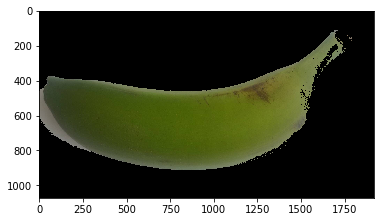

average R: 88.1534910559723
average G: 86.11852279284477
average B: 24.59417418977723


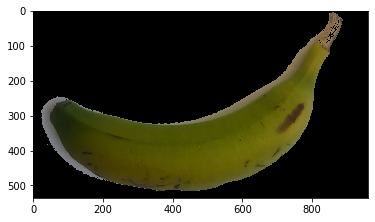

average R: 86.89583214802734
average G: 95.39317503666616
average B: 27.164192233697854


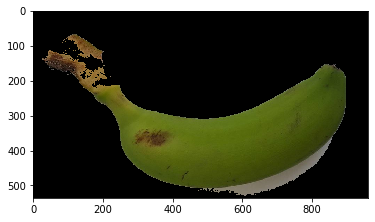

average R: 93.62287907869482
average G: 88.51706059775158
average B: 22.757658454750196


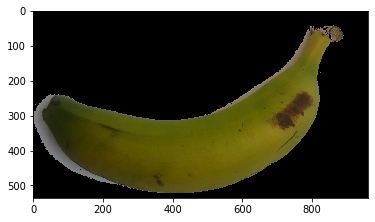

average R: 75.0512397153658
average G: 83.46398710251279
average B: 21.84503852648766


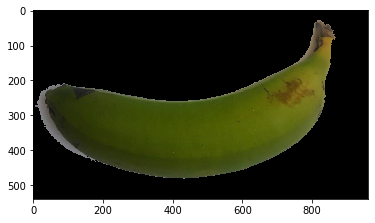

average R: 80.76119640398655
average G: 84.96317870914307
average B: 26.367902741578966


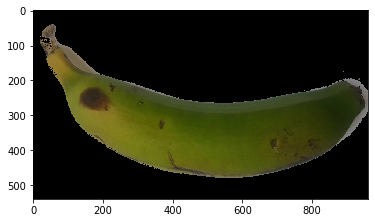

average R: 67.73554749907828
average G: 74.00871942976526
average B: 26.313989502772678


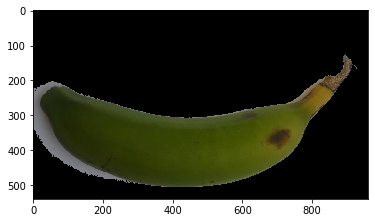

average R: 82.57561970815179
average G: 91.0129869488327
average B: 26.533139615331397


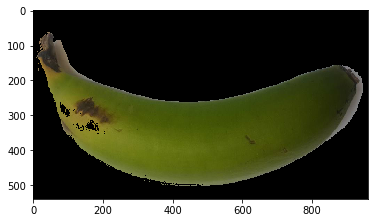

average R: 96.88883198739413
average G: 91.35380849207912
average B: 21.9932506838123


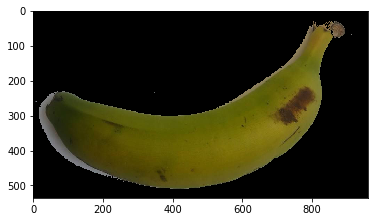

average R: 79.55484356718812
average G: 88.80672314425618
average B: 29.342784091524653


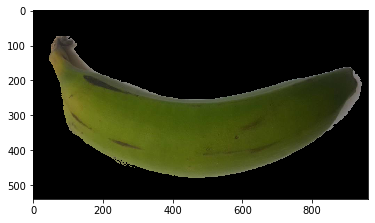

average R: 74.13310261859462
average G: 82.40268378124851
average B: 24.210548691377706


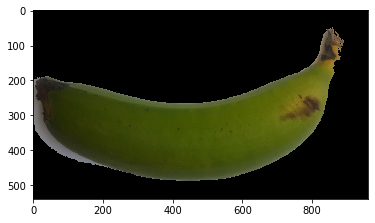

average R: 69.16334876841309
average G: 77.57118257730878
average B: 22.21840575360434


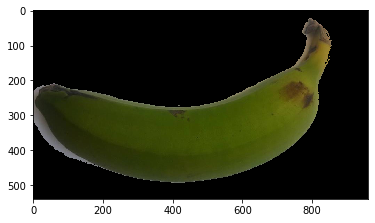

average R: 69.5923172648677
average G: 76.01143459086542
average B: 26.316389228416547


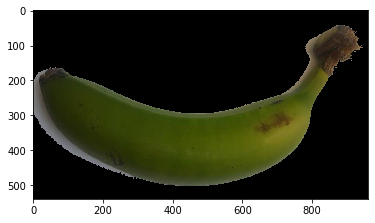

average R: 79.87260412476489
average G: 85.40453463215229
average B: 26.8001481392727


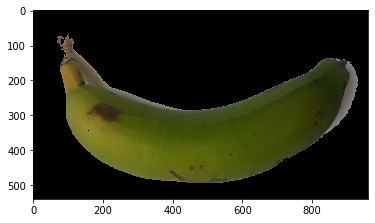

average R: 80.68802680249833
average G: 86.90483698178805
average B: 26.16512963637099


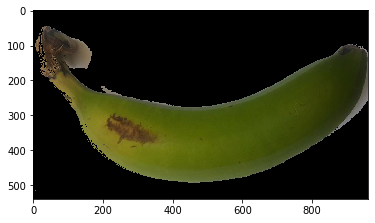

average R: 95.35875798160043
average G: 90.00758192209383
average B: 30.345328237548284


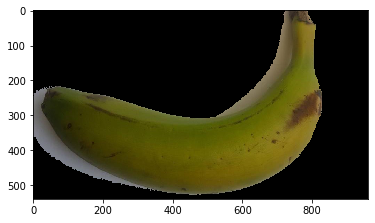

average R: 79.29909526662672
average G: 83.29610545236669
average B: 22.1602559374539


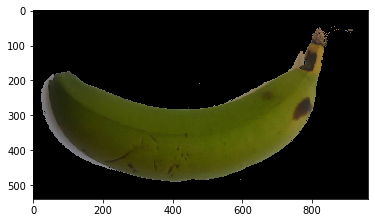

average R: 83.18846884971373
average G: 85.92121342415533
average B: 26.90756125835341


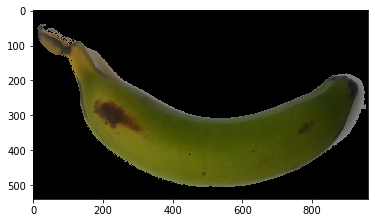

average R: 74.86844435640796
average G: 80.55305104692215
average B: 23.72596004341831


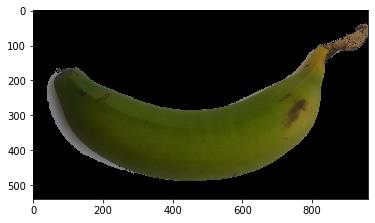

average R: 85.83156028368795
average G: 86.22533616201369
average B: 30.085441960739818


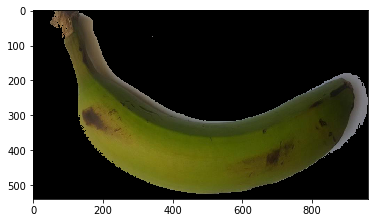

average R: 84.04915695383467
average G: 88.18545978680162
average B: 24.855500422297297


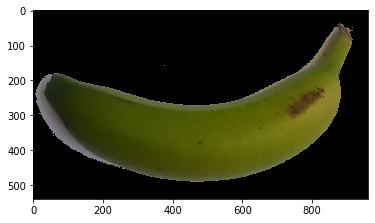

average R: 70.33883324773156
average G: 76.57095317582606
average B: 23.647277970753464


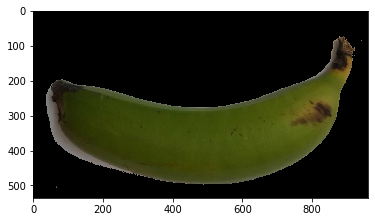

average R: 81.63331391179635
average G: 88.76706480817498
average B: 26.905354409299143


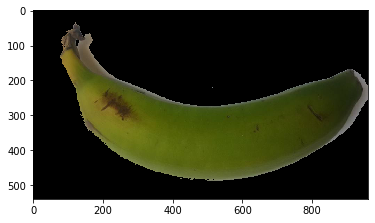

average R: 68.33894480245215
average G: 73.6665339222359
average B: 26.567020865651692


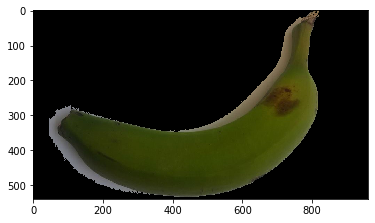

average R: 84.53023908432031
average G: 87.45744210712392
average B: 28.797798108233835


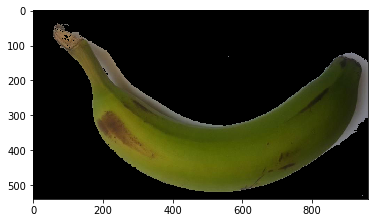

average R: 82.73060278715106
average G: 86.99798961391822
average B: 26.917349685416884


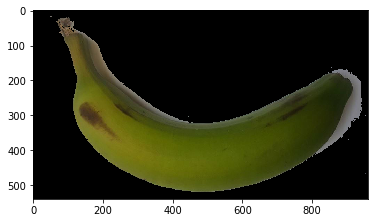

average R: 72.31703530065671
average G: 77.29517704702123
average B: 26.470238095238095


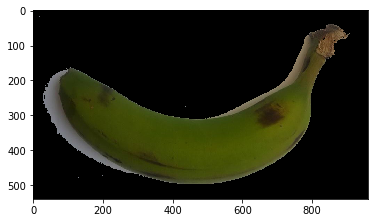

average R: 82.34872593913767
average G: 85.75759276145051
average B: 26.56525492203536


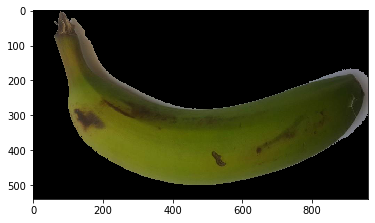

average R: 68.97437390197786
average G: 72.88244143452567
average B: 29.272858279964833


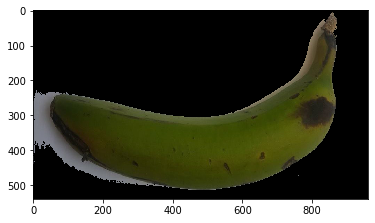

average R: 92.66475133616598
average G: 84.73054357589231
average B: 26.03835999278778


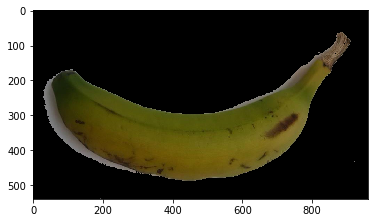

average R: 73.42043561819347
average G: 76.4772232252053
average B: 23.800445324964496


average R: 75.41634672517026
average G: 82.73430001371177
average B: 22.776801486351292


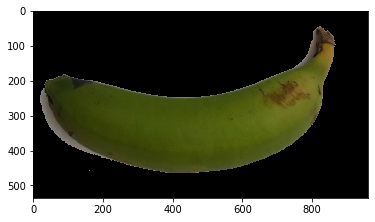

average R: 77.3681468304949
average G: 77.317636788879
average B: 23.016251119280547


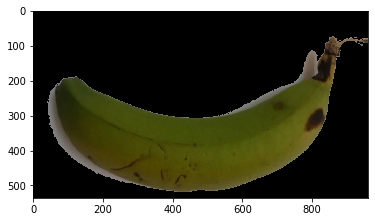

average R: 80.04130391636225
average G: 84.58225648122817
average B: 26.325955431964225


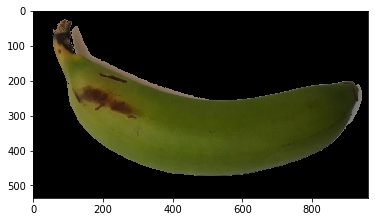

average R: 68.23935210946561
average G: 70.2320579776215
average B: 26.77141437314073


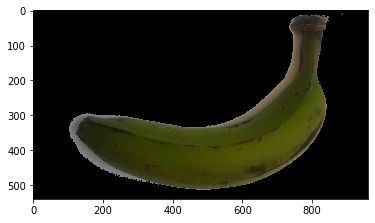

average R: 86.294274117728
average G: 86.26618358595702
average B: 27.443779151119404


average R: 85.83336282832204
average G: 87.12463821066272
average B: 28.88301791946807


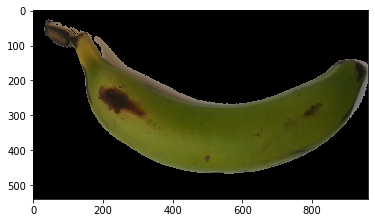

average R: 64.83246903179506
average G: 70.51624075634186
average B: 22.41137974572775


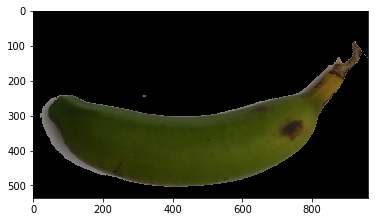

average R: 73.35489208593147
average G: 74.4222613369462
average B: 25.50811841768703


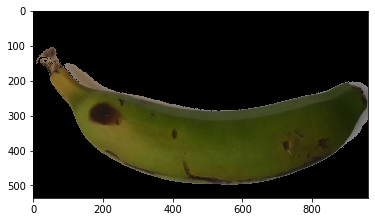

average R: 81.21469004556123
average G: 87.26048538618997
average B: 28.149171635651793


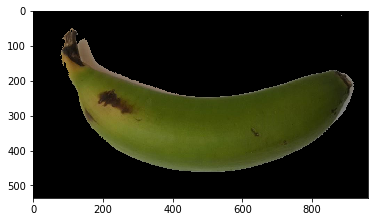

average R: 76.21447465815913
average G: 82.71178640899258
average B: 28.384781373567407


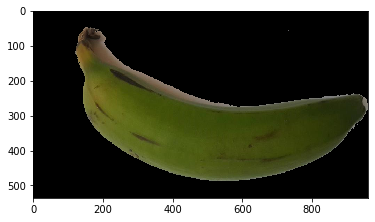

average R: 75.25085732150157
average G: 80.7121756487026
average B: 26.86498806269013


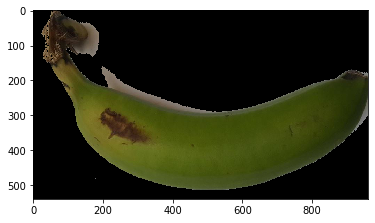

average R: 85.45702396249442
average G: 85.4327550148119
average B: 25.844429699637494


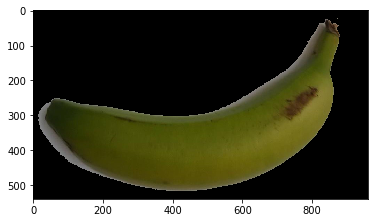

average R: 82.30098580789998
average G: 87.54597751921467
average B: 28.909144337188984


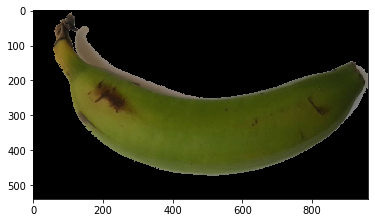

average R: 65.41497555765518
average G: 72.27016493447809
average B: 22.272610317766627


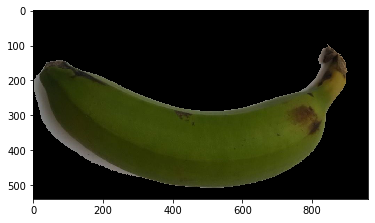

average R: 81.99148311758941
average G: 85.37458377585207
average B: 28.27440260773594


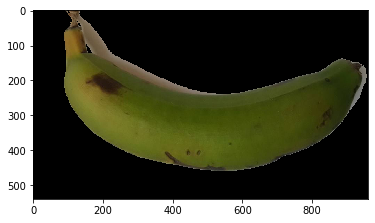

average R: 81.90270392153178
average G: 83.4999185759561
average B: 23.499766987845582


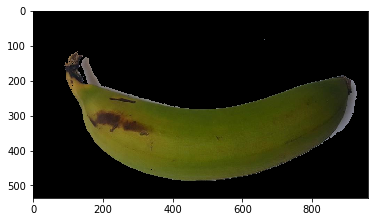

average R: 82.89966415794754
average G: 85.70010710114516
average B: 32.42090060049726


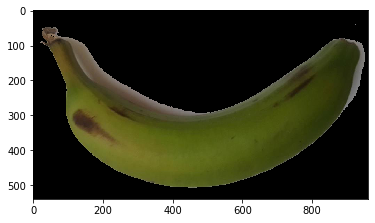

average R: 68.83630375003777
average G: 73.0809718067265
average B: 25.586085083989136


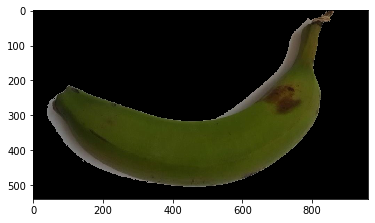

average R: 81.28659089836313
average G: 82.67320329995961
average B: 30.888546662329077


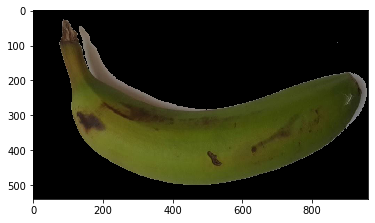

average R: 67.33927745780224
average G: 69.47013191618099
average B: 25.266751389628308


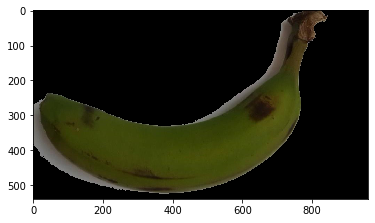

average R: 62.83769078762642
average G: 68.15165610629596
average B: 24.918448748137823


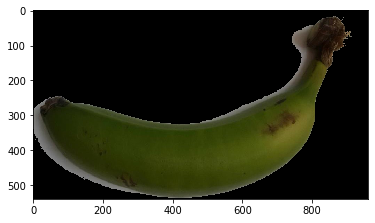

average R: 78.14128604374386
average G: 81.2297713052539
average B: 28.74334193076596


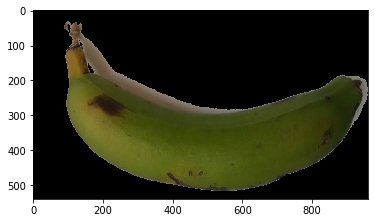

average R: 83.31022171363182
average G: 84.83171409935116
average B: 28.132595954952883


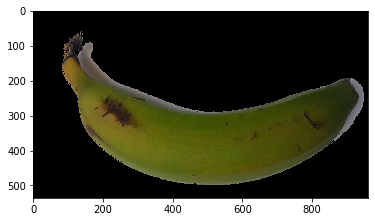

average R: 85.34811300143969
average G: 86.09273938300721
average B: 29.874816368183193


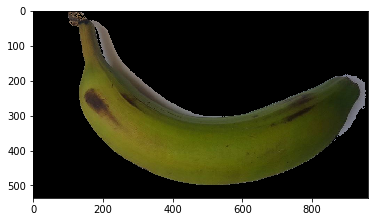

average R: 74.77578780739213
average G: 82.51553526726549
average B: 22.69471025314822


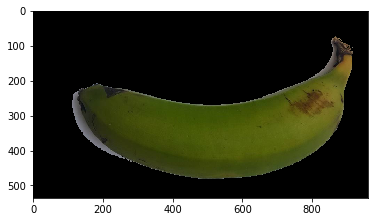

average R: 85.13014580505968
average G: 87.6244446764334
average B: 24.56046229494746


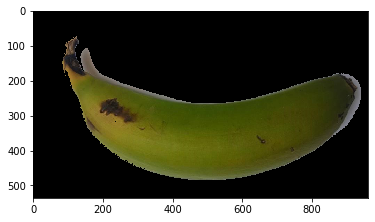

average R: 75.83030257061772
average G: 82.42348509269267
average B: 25.655896362175735


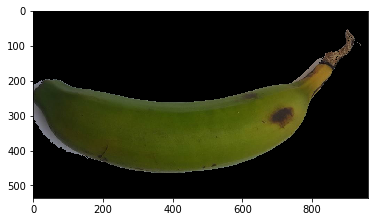

average R: 77.59224141759559
average G: 81.3168605942177
average B: 27.627869828742536


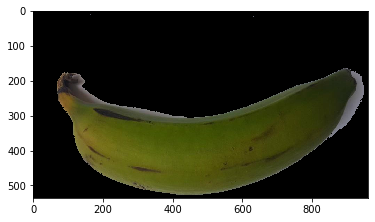

average R: 88.5578565732035
average G: 87.47756189956503
average B: 29.630936734414924


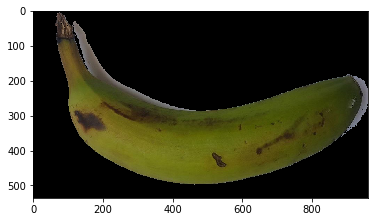

average R: 68.41025692587155
average G: 73.20185687950394
average B: 28.990416750553653


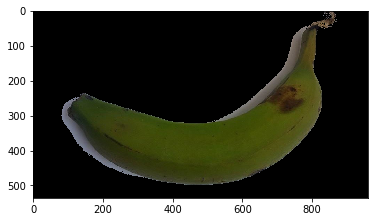

average R: 94.72649845030993
average G: 92.67258423315337
average B: 25.832173206422798


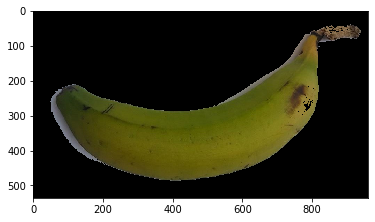

average R: 86.04958290268105
average G: 87.83177168934299
average B: 24.9816062367955


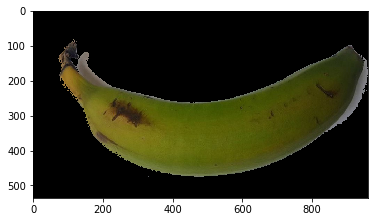

average R: 77.79816610933742
average G: 80.26845014727837
average B: 26.94005738270003


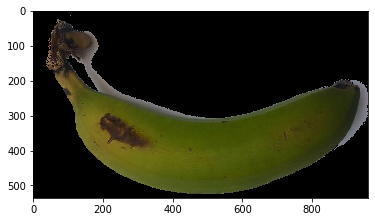

average R: 88.63976760676137
average G: 83.66381129378128
average B: 27.53968747069305


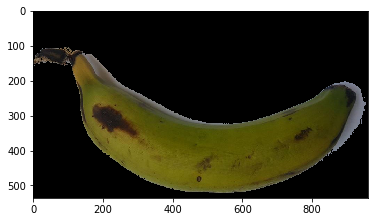

average R: 70.66722680280495
average G: 77.28445834762738
average B: 23.100895117487823


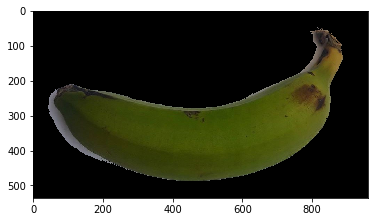

average R: 84.0324873152075
average G: 82.38154650359996
average B: 26.752860500483894


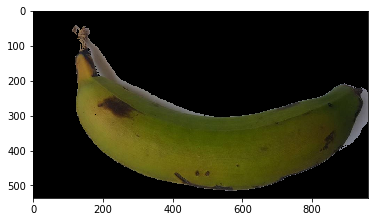

average R: 68.77400327317362
average G: 75.33132927217348
average B: 23.820491868850212


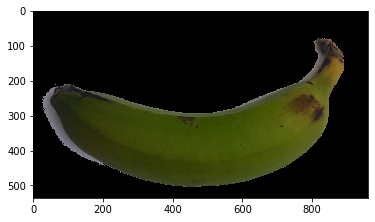

average R: 81.01321501532176
average G: 87.87935712461696
average B: 24.929735283001794


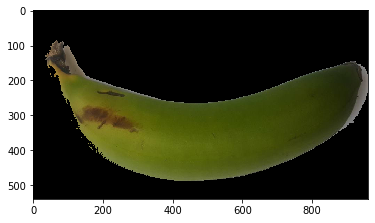

average R: 72.41866653816086
average G: 75.43015416579651
average B: 32.57056641797445


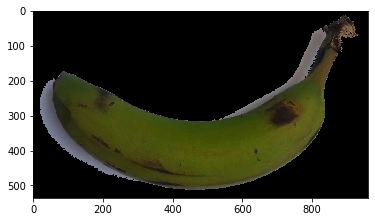

average R: 67.44955695336257
average G: 73.14966168568012
average B: 29.779747997329775


average R: 83.81323181909697
average G: 83.65408335187716
average B: 30.93647658489965


average R: 74.56350571598851
average G: 86.1033354779723
average B: 25.816784117089036


average R: 75.80987109466001
average G: 87.31269656377403
average B: 28.448457077767422


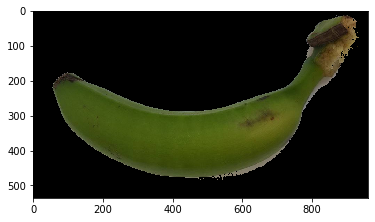

average R: 77.87724953728683
average G: 89.66918910797096
average B: 26.323275744238813


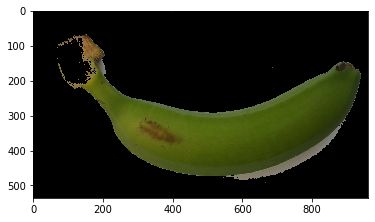

average R: 90.18680825491971
average G: 100.75746603581263
average B: 26.0414879923224


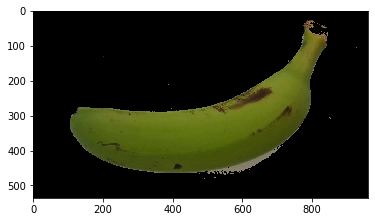

average R: 88.16790728181923
average G: 97.11938780423216
average B: 27.80886553457149


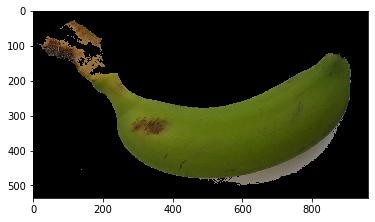

average R: 80.88433483642741
average G: 90.95378133832654
average B: 27.79972239687756


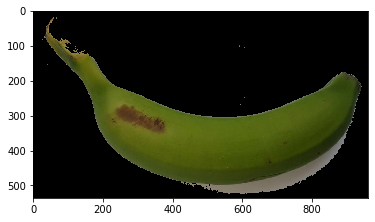

average R: 71.1023437064302
average G: 84.66146617589649
average B: 22.585387981269147


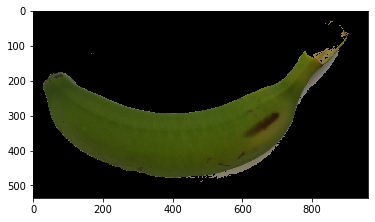

average R: 82.65036765718378
average G: 94.2010905861212
average B: 29.355806533857955


average R: 71.61182735089886
average G: 82.71145197462313
average B: 28.690106546731446


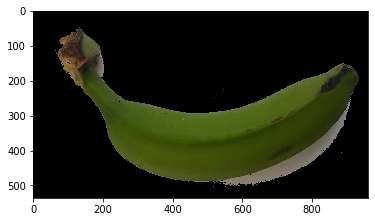

average R: 78.25639602494978
average G: 90.55887250237869
average B: 30.886104392191072


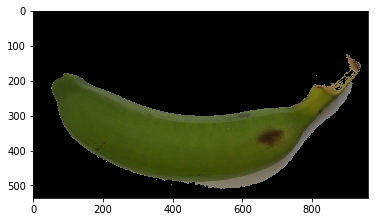

average R: 80.73400483269423
average G: 94.21027472816095
average B: 28.177482921702573


average R: 78.37537832783914
average G: 93.71084507675798
average B: 24.62320733472736


average R: 74.93435398817499
average G: 87.48000073752658
average B: 27.02040276547584


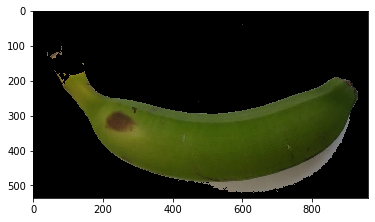

average R: 88.93098555525783
average G: 97.29880276715465
average B: 31.83448502997664


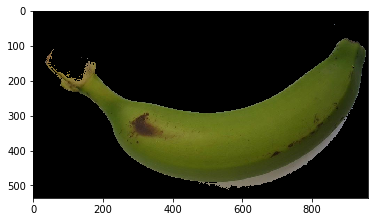

average R: 84.7487282580194
average G: 96.52499490137808
average B: 26.85494251801413


average R: 81.04641203849695
average G: 93.45953292423737
average B: 27.907689101896228


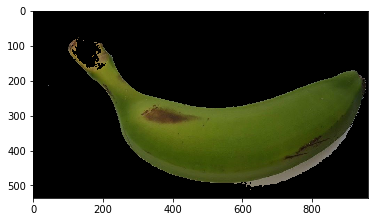

average R: 74.54447921323201
average G: 86.00061547232642
average B: 25.56317406408794


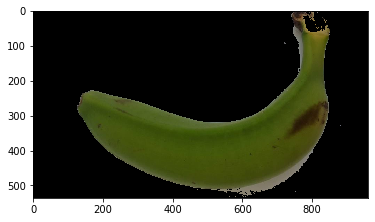

average R: 81.39475746288683
average G: 93.68548534257897
average B: 25.40937187577266


average R: 74.70217189053929
average G: 89.8050623977415
average B: 25.733385101139746


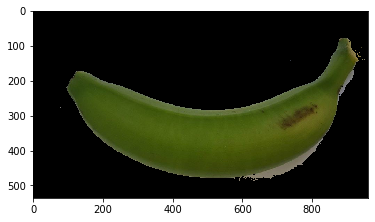

average R: 74.14356338998621
average G: 87.69530716184636
average B: 24.265337802487164


average R: 64.58852220099102
average G: 79.29153846652115
average B: 25.19181884208342


average R: 74.04591039628671
average G: 88.7216268953759
average B: 28.421134869487414


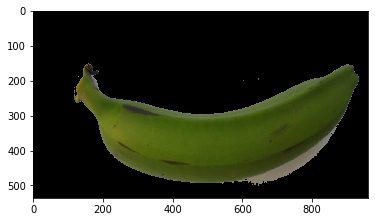

average R: 73.4125801962049
average G: 85.94496116663046
average B: 23.346331490361756


average R: 79.53265595797019
average G: 91.80645347754322
average B: 25.97479326363946


average R: 74.27677864046902
average G: 88.20204518188197
average B: 23.38972802826151


average R: 77.08823858925811
average G: 89.9247406394945
average B: 26.397516537728446


average R: 86.10247450882865
average G: 101.76083212613699
average B: 24.00427268034505


average R: 83.30625178203493
average G: 95.68942829629391
average B: 26.703449910573834


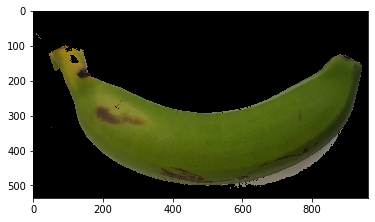

average R: 85.33637502791494
average G: 99.71573024646555
average B: 27.751979792463136


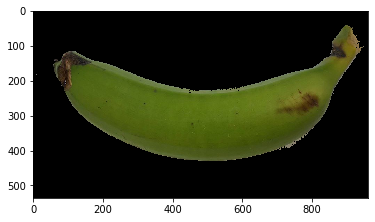

average R: 74.44277248200247
average G: 87.80216633301073
average B: 23.9340232172471


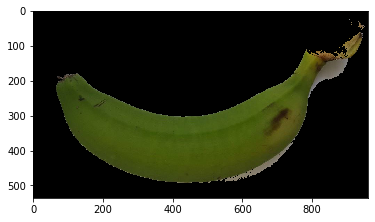

average R: 79.87901665978956
average G: 92.08217067258097
average B: 25.952776272673322


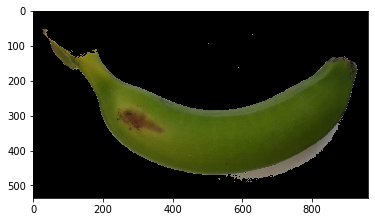

In [69]:
R_list_unripe = []
G_list_unripe = []
B_list_unripe = []
for ripe_fruit in unripe:
    img = cv2.imread(ripe_fruit)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#     ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
#     im_th = thresh.copy()
#     im_floodfill = im_th.copy()
#     height, width = im_th.shape[:2]
#     mask = np.zeros((height+2, width+2), np.uint8)
#     cv2.floodFill(im_floodfill, mask, (0,0), 255)
#     im_floodfill_inv = cv2.bitwise_not(im_floodfill)
#     im_out = im_th | im_floodfill_inv
    
#     thresh = im_out.copy()
#     ellipse = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(2,2))
#     thresh = cv2.dilate(thresh, ellipse, iterations = 1)
#     thresh = cv2.erode(thresh, ellipse, iterations = 1)
#     thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, ellipse, iterations = 1)
    
#     nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(thresh, connectivity=8)
#     sizes = stats[1:, -1]; nb_components = nb_components - 1
#     min_size = 200

#     thresh = np.zeros((output.shape))
#     for i in range(0, nb_components):
#         if sizes[i] >= min_size:
#             thresh[output == i + 1] = 255
    
#     mask = thresh.copy()
#     mask[mask == 255] = 1
#     mask[mask == 0] = 0
    
    threshold = 130
    mask = gray.copy()
    mask[mask < threshold] = 1
    mask[mask >= threshold] = 0
    
    image = plt.imread(ripe_fruit)
    image_R = image[:,:,0]
    image_G = image[:,:,1]
    image_B = image[:,:,2]
    
    image_masked = image.copy()
    image_masked[:,:,0] = image_R * mask
    image_masked[:,:,1] = image_G * mask
    image_masked[:,:,2] = image_B * mask
    
    R = list(filter(lambda a: a != 0, (image_R * mask).flatten()))
    G = list(filter(lambda a: a != 0, (image_G * mask).flatten()))
    B = list(filter(lambda a: a != 0, (image_B * mask).flatten()))
    
    R = list(filter(lambda a: a < 170, R))
    G = list(filter(lambda a: a < 170, G))
    B = list(filter(lambda a: a < 170, B))
    
    print('average R:', np.mean(R))
    print('average G:', np.mean(G))
    print('average B:', np.mean(B))
    
    R_list_unripe.append(np.mean(R))
    G_list_unripe.append(np.mean(G))
    B_list_unripe.append(np.mean(B))
    
    
    plt.imshow(image_masked)
    plt.show()

In [75]:
ripe_df = pd.DataFrame()
ripe_df['R'] = np.array(R_list_ripe) / 255
ripe_df['G'] = np.array(G_list_ripe) / 255
ripe_df['B'] = np.array(B_list_ripe) / 255
ripe_df.to_csv('ripe.csv', header=True, index=False)

In [74]:
unripe_df = pd.DataFrame()
unripe_df['R'] = np.array(R_list_unripe) / 255
unripe_df['G'] = np.array(G_list_unripe) / 255
unripe_df['B'] = np.array(B_list_unripe) / 255
unripe_df.to_csv('unripe.csv', header=True, index=False)